In [27]:
import glob
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [78]:
no_speech_path='../data/silero/silero_no_speech'
silero_ns_files=glob.glob(no_speech_path+'/*/*.wav')
labels_df=pd.read_csv('../data/metadata/stratified_df.csv')

Compute audio durations and create Dataframe

In [76]:
durations_df=pd.DataFrame()

for i,files in enumerate(silero_ns_files):
    filename=files.split('/')[-1]
    y,fs=librosa.core.load(files,sr=None)
    dur=len(y)/fs
    durations_df.loc[i,'Name']=filename
    durations_df.loc[i,'Duration']=dur

In [79]:
df=pd.merge(labels_df,durations_df,left_on='filename',right_on='Name')
columns=['extraversion','neuroticism','agreeableness','conscientiousness','openness','labels_mean','Duration']

## Duration distribution

<AxesSubplot:xlabel='Duration', ylabel='Density'>

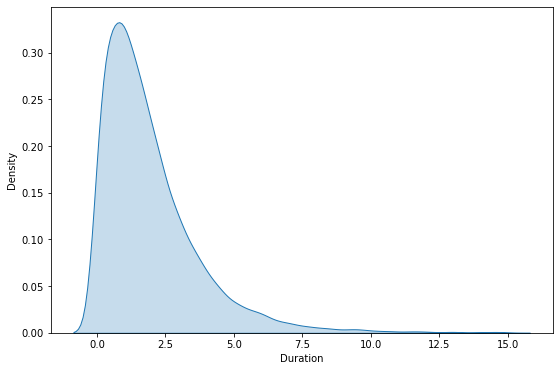

In [80]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(9, 6))
sns.distplot(df['Duration'], hist = False, kde = True, kde_kws={"shade": True})

<AxesSubplot:>

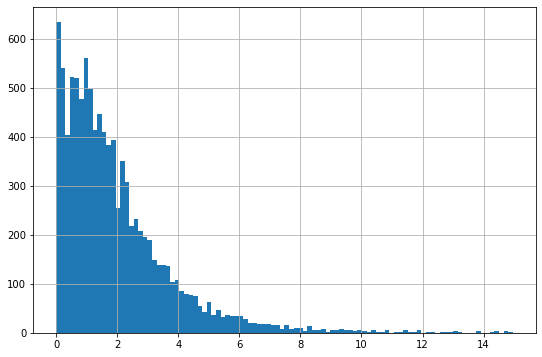

In [81]:
plt.figure(figsize=(9, 6))
df['Duration'].hist(bins=100)

## Correlations (All files)

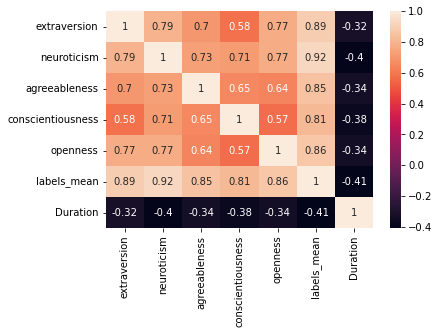

In [82]:
sns.heatmap(df[columns].corr(), annot=True)
plt.show()

# Silero valid splits 

In [88]:
valid_silero='../data/lists/silero_th_0.5_no_speech.txt'
with open (valid_silero) as file:
    list_=file.read().splitlines()

In [90]:
df_valid_silero=df[df['Name'].isin(list_)]

In [91]:
df_valid_silero

,filename,basename,extraversion,neuroticism,agreeableness,conscientiousness,openness,labels_mean,yamnet_no_music_20+speech_rate_>0.5,yamnet_no_music_20+speech_rate_>0.6,...,silero_speech_rate>0.5,silero_speech_rate>0.6,silero_speech_rate>0.7,silero_speech_rate>0.8,silero_speech_rate>0.9,ethnicity,gender,music,Name,Duration
0,mDRMCwSD3Ms.001.wav,mDRMCwSD3Ms,0.579439,0.697917,0.736264,0.766990,0.588889,0.673900,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2,1,1.0,mDRMCwSD3Ms.001.wav,0.552
3,XB81sertsYU.004.wav,XB81sertsYU,0.588785,0.510417,0.648352,0.466019,0.666667,0.576048,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2,2,1.0,XB81sertsYU.004.wav,0.294
13,51KRxB3g7A8.001.wav,51KRxB3g7A8,0.644860,0.656250,0.648352,0.699029,0.622222,0.654143,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2,2,0.0,51KRxB3g7A8.001.wav,0.228
21,X1EjfXX3NTk.002.wav,X1EjfXX3NTk,0.289720,0.437500,0.461538,0.466019,0.488889,0.428733,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2,1,1.0,X1EjfXX3NTk.002.wav,3.062
23,4CiR99jTzso.002.wav,4CiR99jTzso,0.495327,0.510417,0.582418,0.398058,0.577778,0.512799,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,2,2,1.0,4CiR99jTzso.002.wav,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9941,U2RemWUyjts.002.wav,U2RemWUyjts,0.327103,0.375000,0.582418,0.485437,0.488889,0.451769,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,0.0,U2RemWUyjts.002.wav,0.000
9953,J28DwJsK8Do.001.wav,J28DwJsK8Do,0.738318,0.739583,0.681319,0.786408,0.722222,0.733570,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,2,0.0,J28DwJsK8Do.001.wav,1.584
9975,hhdoeK8SsiI.004.wav,hhdoeK8SsiI,0.551402,0.447917,0.571429,0.485437,0.600000,0.531237,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,hhdoeK8SsiI.004.wav,0.840
9982,PReOtefm17s.004.wav,PReOtefm17s,0.542056,0.656250,0.560440,0.650485,0.800000,0.641846,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2,1,1.0,PReOtefm17s.004.wav,0.420


Correlations

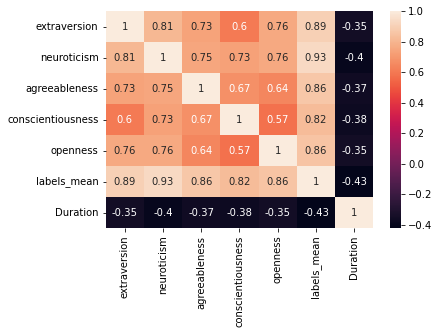

In [92]:
sns.heatmap(df_valid_silero[columns].corr(), annot=True)
plt.show()

No-speech samples with duration greater than 2 seconds

In [94]:
df_valid_silero_greater_2sec=df_valid_silero[df_valid_silero['Duration']>2]

In [99]:
with open ('../data/lists/silero_valid_split_no_speech_greater_2sec.txt','w') as file:
    for i in df_valid_silero_greater_2sec.filename:
        file.write(i+'\n')

In [ ]:
df_valid_silero[df_valid_silero['Duration']>1.5]